In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

# Exercises

#### Create a new notebook, random_forests, and work with titanic data to do the following:



In [2]:
df = acquire.get_titanic_data()

Found CSV


In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df = prepare.prep_titanic(df)

In [5]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [6]:
train, validate, test = prepare.split_function(df, 'survived')

In [7]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [8]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [9]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [10]:
baseline_accuracy = 329 / (329+205)
print(f'Baseline Accuracy: {baseline_accuracy:.02%}')

Baseline Accuracy: 61.61%


534

In [11]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [12]:
target = 'survived'

In [13]:
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [14]:
y_validate = validate[target]
y_test = test[target]

-

In [155]:
X_train = train[train.columns[2:]].drop(columns=['sex', 'embarked'])
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [156]:
X_validate = validate[validate.columns[2:]].drop(columns=['sex','embarked'])
X_test = test[test.columns[2:]].drop(columns=['sex','embarked'])

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [128]:
rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [129]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [130]:
rf.predict(X_train)[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [21]:
y_pred = rf.predict(X_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [19]:
rf.score(X_train, y_train)

0.9438202247191011

In [20]:
rf.score(X_validate, y_validate)

0.7584269662921348

In [22]:
confusion_matrix(y_train, y_pred)

array([[324,   5],
       [ 25, 180]])

In [23]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [24]:
pd.DataFrame(confusion_matrix(y_train, y_pred),
             index=[str(label) + '_actual' for label in labels],
             columns=[str(label) + '_predict' for label in labels])

,0_predict,1_predict
0_actual,324,5
1_actual,25,180


In [25]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [27]:
confusion_matrix(y_train, y_pred).ravel()

array([324,   5,  25, 180])

In [28]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(324, 5, 25, 180)

In [29]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [31]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_neg}")
print(f"Support (1): {support_pos}")

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 329
Support (1): 205


#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [32]:
for x in range(1,10):
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=x)
    rf.fit(X_train, y_train)
    acc = rf.score(X_train, y_train)
    print(f'for max depth of {x:2}, the accuracy is {acc:.2%}')

for max depth of  1, the accuracy is 75.47%
for max depth of  2, the accuracy is 79.40%
for max depth of  3, the accuracy is 82.40%
for max depth of  4, the accuracy is 84.64%
for max depth of  5, the accuracy is 85.96%
for max depth of  6, the accuracy is 88.01%
for max depth of  7, the accuracy is 90.26%
for max depth of  8, the accuracy is 93.26%
for max depth of  9, the accuracy is 94.01%


In [102]:
for x in range(1,10):
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=10)
    rf.fit(X_train, y_train)
    acc = rf.score(X_train, y_train)
    print(f'for min samples leaf of {x:2}, the accuracy is {acc:.2%}')

for min samples leaf of  1, the accuracy is 94.38%
for min samples leaf of  2, the accuracy is 89.70%
for min samples leaf of  3, the accuracy is 88.01%
for min samples leaf of  4, the accuracy is 86.52%
for min samples leaf of  5, the accuracy is 84.46%
for min samples leaf of  6, the accuracy is 84.27%
for min samples leaf of  7, the accuracy is 84.08%
for min samples leaf of  8, the accuracy is 83.52%
for min samples leaf of  9, the accuracy is 83.33%


In [157]:
for x in range(1,11):
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    print(f'for min samples leaf of {x:2}, max depth of {11-x} the accuracy is {train_acc, val_acc}')

for min samples leaf of  1, max depth of 10 the accuracy is (0.9438202247191011, 0.7584269662921348)
for min samples leaf of  2, max depth of 9 the accuracy is (0.8913857677902621, 0.7865168539325843)
for min samples leaf of  3, max depth of 8 the accuracy is (0.8707865168539326, 0.7865168539325843)
for min samples leaf of  4, max depth of 7 the accuracy is (0.8614232209737828, 0.797752808988764)
for min samples leaf of  5, max depth of 6 the accuracy is (0.8426966292134831, 0.7921348314606742)
for min samples leaf of  6, max depth of 5 the accuracy is (0.8370786516853933, 0.8089887640449438)
for min samples leaf of  7, max depth of 4 the accuracy is (0.8258426966292135, 0.797752808988764)
for min samples leaf of  8, max depth of 3 the accuracy is (0.8258426966292135, 0.7865168539325843)
for min samples leaf of  9, max depth of 2 the accuracy is (0.7940074906367042, 0.7865168539325843)
for min samples leaf of 10, max depth of 1 the accuracy is (0.7546816479400749, 0.7640449438202247)


In [131]:
for x in range(1,11):
    print(x, 11-x)

1 10
2 9
3 8
4 7
5 6
6 5
7 4
8 3
9 2
10 1


#### My best model

In [120]:
rf = RandomForestClassifier(random_state=123, min_samples_leaf=6, max_depth=3)

In [121]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=6, random_state=123)

In [122]:
rf.score(X_train, y_train)

0.8183520599250936

In [123]:
rf.score(X_validate, y_validate)

0.8033707865168539

#### Adjusted hyperparameters

In [138]:
rf = RandomForestClassifier(random_state=123, min_samples_leaf=6, max_depth=5)

In [139]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=6, random_state=123)

In [140]:
rf.score(X_train, y_train)

0.8370786516853933

In [141]:
rf.score(X_validate, y_validate)

0.8089887640449438

#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [96]:
max_depth_scores = []

for x in range(1,10):
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=x)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    
    val_acc = rf.score(X_validate, y_validate)
    
    max_depth_scores.append([x, train_acc, val_acc])

In [98]:
max_depth_df = pd.DataFrame(max_depth_scores, columns=['max_depth','train_acc','val_acc'])
max_depth_df.head()

,max_depth,train_acc,val_acc
0,1,0.754682,0.764045
1,2,0.794007,0.786517
2,3,0.823970,0.803371
3,4,0.846442,0.803371
4,5,0.859551,0.797753


In [103]:
min_leaf_scores = []

for x in range(1,10):
    rf2 = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=10)
    rf2.fit(X_train, y_train)
    train_acc = rf2.score(X_train, y_train)
    
    val_acc = rf2.score(X_validate, y_validate)
    
    min_leaf_scores.append([x, train_acc, val_acc])

In [105]:
min_leaf_df = pd.DataFrame(min_leaf_scores, columns=['min_leaf', 'train_acc', 'val_acc'])
min_leaf_df.head()

,min_leaf,train_acc,val_acc
0,1,0.943820,0.758427
1,2,0.897004,0.786517
2,3,0.880150,0.786517
3,4,0.865169,0.814607
4,5,0.844569,0.803371


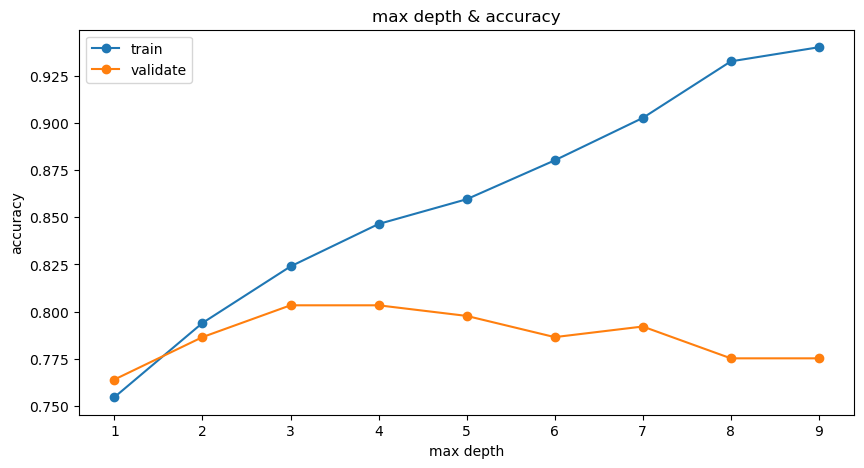

In [115]:
plt.figure(figsize=(10,5))
plt.plot(max_depth_df.max_depth, max_depth_df.train_acc, label='train', marker='o')
plt.plot(max_depth_df.max_depth, max_depth_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('max depth & accuracy')
plt.legend()
plt.show()

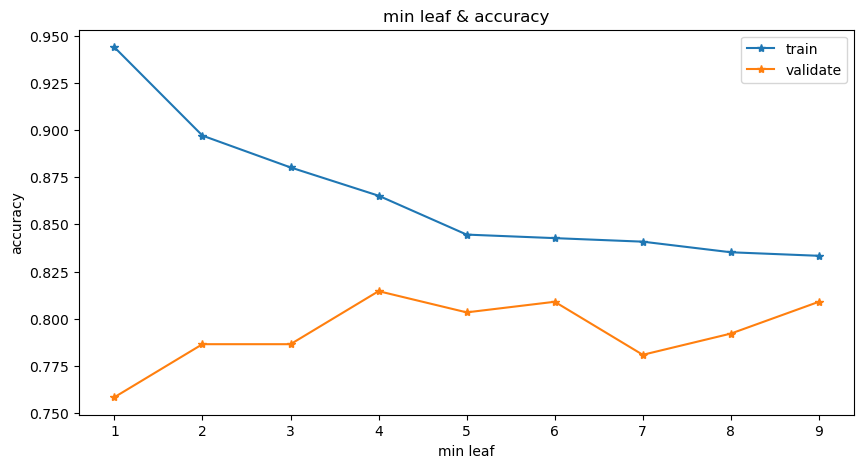

In [114]:
plt.figure(figsize=(10,5))
plt.plot(min_leaf_df.min_leaf, min_leaf_df.train_acc, label='train', marker='*')
plt.plot(min_leaf_df.min_leaf, min_leaf_df.val_acc, label='validate', marker='*')
plt.xlabel('min leaf')
plt.ylabel('accuracy')
plt.title('min leaf & accuracy')
plt.legend()
plt.show()

In [ ]:
# attempting to make a function, I deleted everything because I got really confused. 
# I think I got it

In [10]:
target_variable = 'survived'
baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 61.61%


Baseline Accuracy: 61.61%
Confusion Matrix:
[[324   5]
 [ 25 180]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


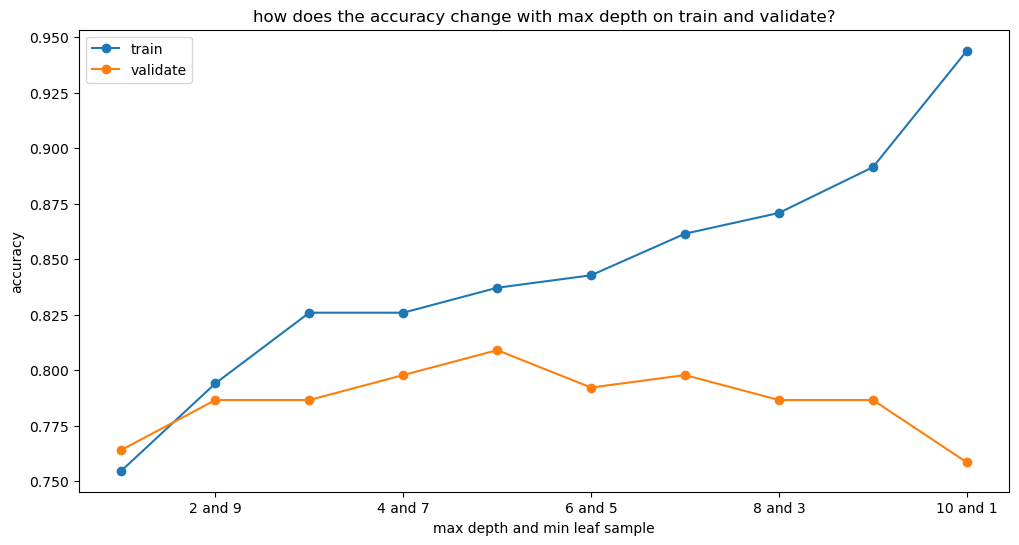

You can print scores_df for numbers assosiated with graph.


In [28]:
baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns='passenger_id')
X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns='passenger_id')
X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns='passenger_id')

y_train = train[target_variable]
y_validate = validate[target_variable]
y_test = test[target_variable]

rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

scores_all = []
for x in range(1,11):
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    scores_all.append([x, 11-x, train_acc, val_acc])


scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf', 'max_depth', 'train_acc', 'val_acc'])
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc



plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([2,4,6,8,10],
          [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 3'),('10 and 1')]
          )

plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()
print(f'You can print scores_df for numbers assosiated with graph.')

In [30]:
def random_tree_accuracy(train, validate, test, target_variable):
    """
    input target_variable as string
    """

    baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
    print(f'Baseline Accuracy: {baseline_accuracy:.2%}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns='passenger_id')
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns='passenger_id')
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns='passenger_id')
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
    
    all_ = (TP + TN + FP + FN)
    
    accuracy = (TP + TN) / all_
    print(f"Accuracy: {accuracy}\n")
    
    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    
    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    
    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    
    support_pos = TP + FN
    support_neg = FP + TN
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")
    
    scores_all = []
    for x in range(1,11):
        rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
        rf.fit(X_train, y_train)
        train_acc = rf.score(X_train, y_train)
        val_acc = rf.score(X_validate, y_validate)
        
        scores_all.append([x, 11-x, train_acc, val_acc])
    
    
    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf', 'max_depth', 'train_acc', 'val_acc'])
    scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
    
    
    
    plt.figure(figsize=(12,6))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
    plt.xlabel('max depth and min leaf sample')
    plt.ylabel('accuracy')
    
    plt.xticks([2,4,6,8,10],
              [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 3'),('10 and 1')]
              )
    
    plt.title('how does the accuracy change with max depth on train and validate?')
    plt.legend()
    plt.show()
    print(f'You can print scores_df for numbers assosiated with graph.')
    

Baseline Accuracy: 61.61%
Confusion Matrix:
[[324   5]
 [ 25 180]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


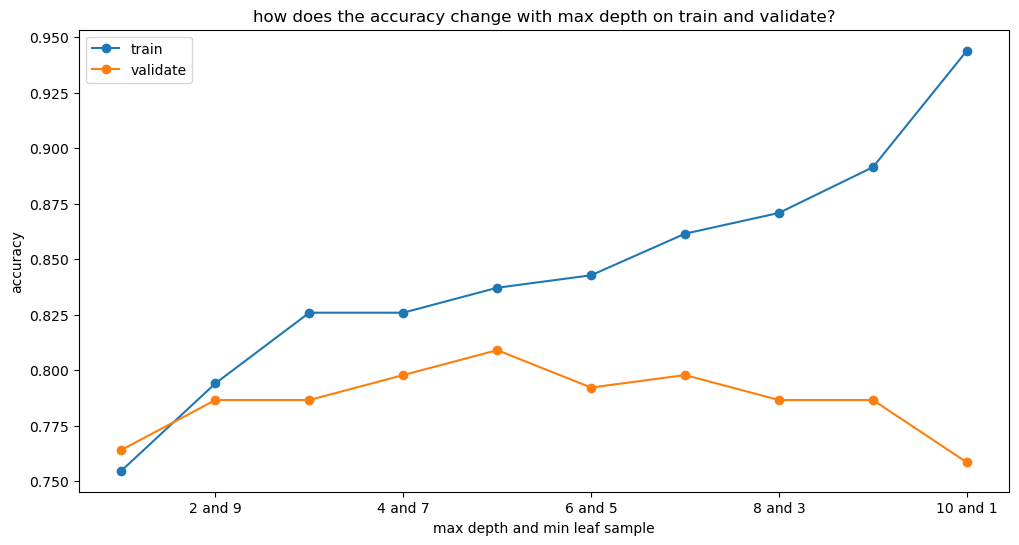

You can print scores_df for numbers assosiated with graph.


In [31]:
random_tree_accuracy(train, validate, test, 'survived')

#### Keep this function

In [32]:
def random_tree_accuracy(train, validate, test, target_variable, drop_cols):
    """
    input target_variable as string
    drop_cols formatted as: ['col1', 'col2', 'etc'] for multiple columns
    """

    baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
    print(f'Baseline Accuracy: {baseline_accuracy:.2%}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
    
    all_ = (TP + TN + FP + FN)
    
    accuracy = (TP + TN) / all_
    print(f"Accuracy: {accuracy}\n")
    
    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    
    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    
    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    
    support_pos = TP + FN
    support_neg = FP + TN
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")
    
    scores_all = []
    for x in range(1,11):
        rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
        rf.fit(X_train, y_train)
        train_acc = rf.score(X_train, y_train)
        val_acc = rf.score(X_validate, y_validate)
        
        scores_all.append([x, 11-x, train_acc, val_acc])
    
    
    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf', 'max_depth', 'train_acc', 'val_acc'])
    scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
    
    
    
    plt.figure(figsize=(12,6))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
    plt.xlabel('max depth and min leaf sample')
    plt.ylabel('accuracy')
    
    plt.xticks([2,4,6,8,10],
              [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 3'),('10 and 1')]
              )
    
    plt.title('how does the accuracy change with max depth on train and validate?')
    plt.legend()
    plt.show()
    scores_df
    

Baseline Accuracy: 61.61%
Confusion Matrix:
[[324   5]
 [ 25 180]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


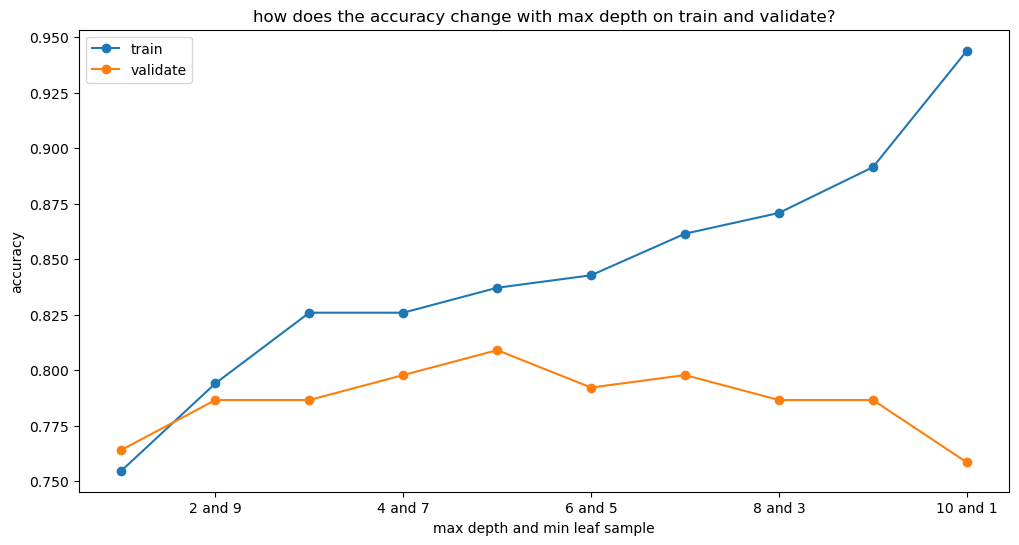

You can print scores_df for numbers assosiated with graph.


In [34]:
random_tree_accuracy1(train, validate, test, 'survived', 'passenger_id')